In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
import pickle

In [4]:
path_to_save = "/scratch/cinthiasouza/mv-text-summarizer/notebook/sv_models_v1/test_10"
embed_path = 'embed_bert'
sections=['introduction', 'materials', 'conclusion']
name_models = ['knn', 'ab', 'rf', 'cb', 'gb']

columns = list(range(0, 383))
columns = list(map(str, columns))

models = {}

for section in sections:
    
    aux_models = {}
    for name_model in name_models:
    
        model = joblib.load('{}/{}_{}.pkl'.format(path_to_save, name_model, section))
        
        aux_models[name_model]=model
    
    models[section] = aux_models

In [5]:
forest = models['introduction']['rf']

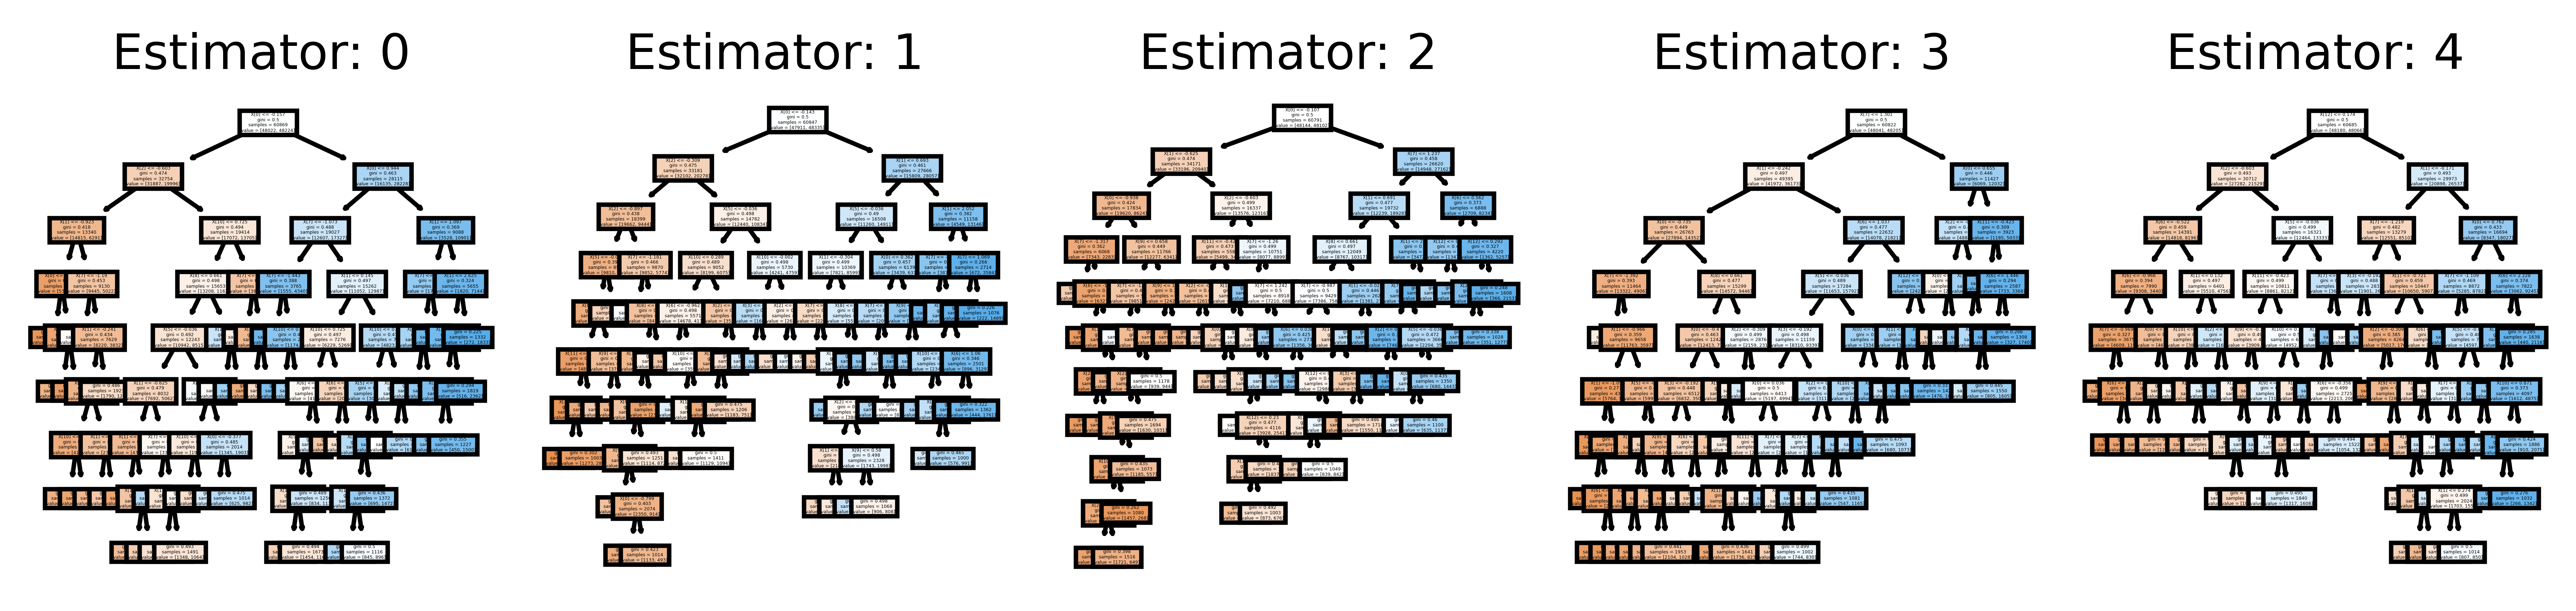

In [6]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(forest.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [41]:
def plot_features_importances(section, name_model):
    
    
    
    forest = models[section][name_model]
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

In [45]:
def shap_explained(section, name_model, X_test):
    
    forest = models[section][name_model]
    explainer = shap.TreeExplainer(forest)
    shap_values = explainer.shap_values(X_test)
    shap.plots.beeswarm(values=shap_values)
    

In [32]:
with open('dataset/dataset_{}.pkl'.format('features'), 'rb') as fp:
    dataset = pickle.load(fp)

# RF

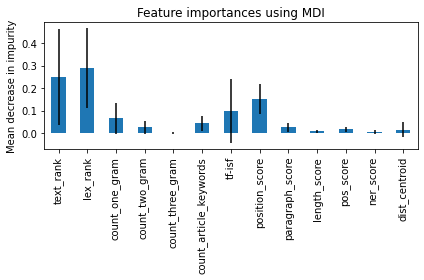

In [42]:
plot_features_importances(section='introduction', name_model='rf')

In [46]:
shap_explained('introduction', 'rf', dataset['introduction']['X_test_features'])

TypeError: beeswarm() got an unexpected keyword argument 'values'

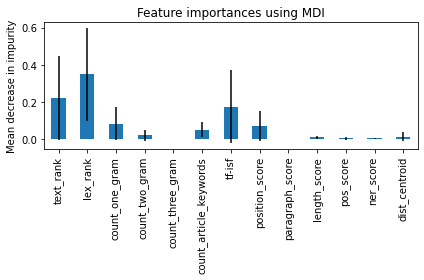

In [21]:
plot_features_importances(section='materials', name_model='rf')

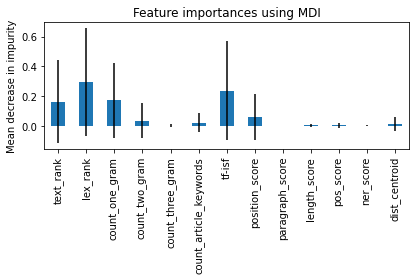

In [22]:
plot_features_importances(section='conclusion', name_model='rf')

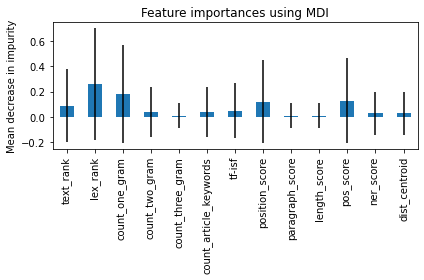

In [23]:
plot_features_importances(section='introduction', name_model='ab')

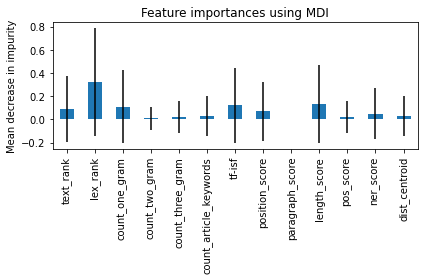

In [24]:
plot_features_importances(section='materials', name_model='ab')

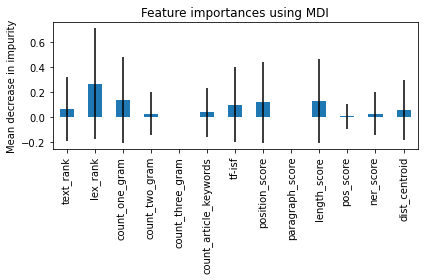

In [26]:
plot_features_importances(section='conclusion', name_model='ab')